# Práctica 1

Explicacion de la práctica

In [1]:
# Importamos las librerias necesarias para poder depurar el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
airbnbs = pd.read_csv('./DatasetsLab1/airbnb.csv', encoding='latin-1')
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


### Eliminamos los valores NaN

In [3]:
airbnbs = airbnbs.dropna()


### Eliminamos valores duplicados

In [4]:
airbnbs = airbnbs.drop_duplicates() #elimina las filas duplicadas


### Filtramos las columnas que nos interesen de todo el dataframe

La columna de reseñas por mes, las dividimos en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. 

In [5]:
columnaResenasMes = airbnbs[["reviews_per_month"]] #sacamos solo la columna de reseñas por mes
columnaResenasMes.head(10) #mostramos las 10 primera para confirmar que lo hemos hecho bien

,reviews_per_month
0,0.21
1,0.38
3,4.64
4,0.10
5,0.59
6,0.40
7,3.47
8,0.99
9,1.33
10,0.43


Para saber como dividir en 3 grupos los valores, vamos a ver cual es el valor maximo y cual es el valor minimo de esta columna. 

In [6]:
maxResenas = columnaResenasMes.max()
print(str(maxResenas))
minResenas = columnaResenasMes.min()
print(str(minResenas))

reviews_per_month    58.5
dtype: float64
reviews_per_month    0.01
dtype: float64


Dividimos 58.5 entre tres para dividir por grupos

In [7]:
maxResenas/3

reviews_per_month    19.5
dtype: float64

##### Calidad baja iria de 0 a 19.5
##### Calidad media iria de 19.5 a 39
##### Calidad alta iria de 39 a 58.5
### Creamos otra columna, con la calidad, que añadiremos "Baja" "Media" y "Alta" según los valores mostrados arriba

In [8]:
#for index in range(columnaResenasMes.shape)):
  #  print(index)
airbnbs["Calidad"] = "None"
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,None
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,None
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,None
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,None
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,None
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,None
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,None
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,None
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,None
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,None


In [9]:

airbnbs[["reviews_per_month", "Calidad"]]
airbnbs.dropna().head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,None
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,None
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,None
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,None
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,None
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,None
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,None
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,None
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,None
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,None


In [10]:
for i, items in enumerate(airbnbs["reviews_per_month"].values):
    if items < 19.5:
        airbnbs.loc[i, "Calidad"] = "Baja"
    elif items >= 19.5 and items < 39: 
        airbnbs.loc[i, "Calidad" ] = "Media"
    elif items >= 39: 
        airbnbs.loc[i, "Calidad" ] = "Alta"
    
airbnbs.dropna()
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Baja
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Baja
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Baja
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Baja
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Baja
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Baja
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Baja
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Baja
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Baja
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Baja


      
### Ya tenemos la columna Calidad creada, ahora vamos a hacer lo mismo con la disponibilidad

La columna de disponibilidad, las dividimos en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: "Poco Disponnible", "Disponible normalmemte", "Altamente disponible"
Como hay 365 dias, dividimos los rangos en 122
de 0 a 122: poca dispoibilidad
de 122 a 244: Media disponibilidad
de 224 a 365: alta

In [11]:
airbnbs["Disponibilidad"] = ""
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad,Disponibilidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Baja,
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Baja,
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Baja,
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Baja,
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Baja,
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Baja,
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Baja,
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Baja,
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Baja,
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Baja,


### Columna Disponibilidad vacia creada, la rellenamos con datos

In [12]:
i = 0
for items in airbnbs["availability_365"].values:
    #print("iteracion " + str(i))
    #print("Reviews per Month " + str(items))
    if items < 122:
        airbnbs.loc[i, "Disponibilidad"] = "Poco disponible"
        #print("Calidad buena")
        #print(items)
    if items > 121 and items < 244: 
        airbnbs.loc[i, "Disponibilidad" ] = "Disponible normalmente"
        #print(items)
    if items > 243: 
        airbnbs.loc[i, "Disponibilidad" ] = "Altamente disponible"
        #print(items)
    i = i +1
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad,Disponibilidad
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Baja,Altamente disponible
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Baja,Altamente disponible
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Baja,Poco disponible
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Baja,Disponible normalmente
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Baja,Poco disponible
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Baja,Disponible normalmente
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Baja,Poco disponible
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Baja,Disponible normalmente
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Baja,Poco disponible
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Baja,Poco disponible


### Clasificamos apartamentos. Creamos una columna Clasificacion

In [13]:
airbnbs["Clasificacion"] = ""
airbnbs.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad,Disponibilidad,Clasificacion
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Baja,Altamente disponible,
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Baja,Altamente disponible,
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Baja,Poco disponible,
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Baja,Disponible normalmente,
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Baja,Poco disponible,
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Baja,Disponible normalmente,
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Baja,Poco disponible,
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Baja,Disponible normalmente,
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Baja,Poco disponible,
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Baja,Poco disponible,


### Rellenamos la columna de clasificacion

In [14]:
airbnbs.dropna()

for i, items in enumerate(airbnbs["Calidad"].values):
    #print("iteracion " + str(i))
    #print(airbnbs.loc[i, "Disponibilidad"])
    #print("Reviews pe Month " + str(items))
    #disponibilidad = airbnbs.loc[i, "Disponibilidad"]
    #print(disponibilidad)     
    #print(items)
    if i == 38823:
        break
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print("Calidad buena")
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Poco disponible":
        airbnbs.loc[i, "Clasificacion"] = "Muy Bueno"
        #print(airbnbs.items)
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalmente":
        airbnbs.loc[i, "Clasificacion"] = "Regular"
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalmente":
        airbnbs.loc[i, "Clasificacion"] = "Regular"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Disponible normalemnte":
        airbnbs.loc[i, "Clasificacion"] = "Bueno"
        #print(airbnbs.items)
    if items == "Baja" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Malo"
        #print(airbnbs.items)
    if items == "Media" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Malo"
        #print(airbnbs.items)
    if items == "Alta" and airbnbs.loc[i, "Disponibilidad"] == "Altamente disponible":
        airbnbs.loc[i, "Clasificacion"] = "Muy Malo"
        #print(airbnbs.items)
  
    #print()
airbnbs.head(10)
    

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Calidad,Disponibilidad,Clasificacion
0,2539.0,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0,Baja,Altamente disponible,Malo
1,2595.0,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0,Baja,Altamente disponible,Malo
3,3831.0,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0,Baja,Poco disponible,Bueno
4,5022.0,Entire Apt: Spacious Studio/Loft by central park,7192.0,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10.0,9.0,2018-11-19,0.10,1.0,0.0,Baja,Disponible normalmente,Regular
5,5099.0,Large Cozy 1 BR Apartment In Midtown East,7322.0,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3.0,74.0,2019-06-22,0.59,1.0,129.0,Baja,Poco disponible,Bueno
6,5121.0,BlissArtsSpace!,7356.0,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45.0,49.0,2017-10-05,0.40,1.0,0.0,Baja,Disponible normalmente,Regular
7,5178.0,Large Furnished Room Near B'way,8967.0,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2.0,430.0,2019-06-24,3.47,1.0,220.0,Baja,Poco disponible,Bueno
8,5203.0,Cozy Clean Guest Room - Family Apt,7490.0,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2.0,118.0,2017-07-21,0.99,1.0,0.0,Baja,Disponible normalmente,Regular
9,5238.0,Cute & Cozy Lower East Side 1 bdrm,7549.0,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1.0,160.0,2019-06-09,1.33,4.0,188.0,Baja,Poco disponible,Bueno
10,5295.0,Beautiful 1br on Upper West Side,7702.0,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5.0,53.0,2019-06-22,0.43,1.0,6.0,Baja,Poco disponible,Bueno


## Agrupamos por barrio para saber el número total de reseñas por barrio

In [15]:
resenas_por_barrio = airbnbs.groupby("neighbourhood")["number_of_reviews"].sum()
resenas_por_barrio

neighbourhood
Allerton            1803.0
Arden Heights         31.0
Arrochar             307.0
Arverne             2253.0
Astoria            19310.0
                    ...   
Willowbrook            9.0
Windsor Terrace     4324.0
Woodhaven           2792.0
Woodlawn             484.0
Woodside            5035.0
Name: number_of_reviews, Length: 218, dtype: float64

### ordenamos estos valores para sacar los 5 primeros

In [16]:
# Ordenar los resultados de forma descendente y tomar los primeros 5
top_5_barrios = resenas_por_barrio.sort_values(ascending=False).head(5)
# Imprimir los resultados
#print(top_5_barrios)
top_5_barrios.reset_index()

,neighbourhood,number_of_reviews
0,Bedford-Stuyvesant,110352.0
1,Williamsburg,85427.0
2,Harlem,75927.0
3,Bushwick,52508.0
4,Hell's Kitchen,49940.0


## Mostramos una grafica burbuja con los datos

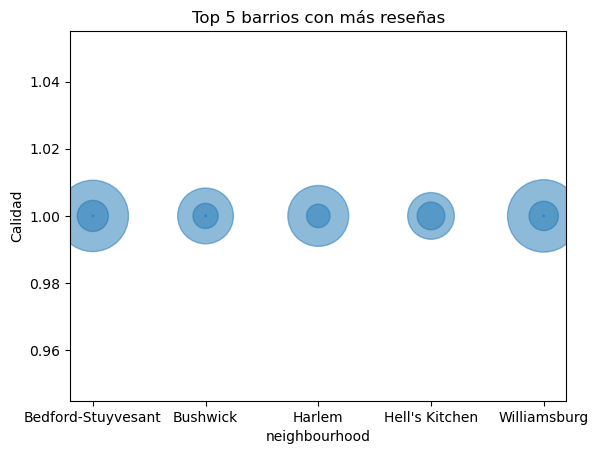

In [17]:
grouped = airbnbs.groupby('neighbourhood')['Calidad'].value_counts()
# mostrar los resultados
#print(grouped)


# Crear un dataframe con los 5 barrios y su número total de reseñas
df = pd.DataFrame({'neighbourhood': top_5_barrios.index, 'Calidad': top_5_barrios.values})
barriosresenas = pd.merge(grouped, df, on="neighbourhood")
#print(barriosresenas)


#print(df)
# Crear la figura y los ejes del diagrama de burbuja
fig, ax = plt.subplots()

# Crear el diagrama de burbuja
ax.scatter(x=barriosresenas['neighbourhood'], y=[1]*len(barriosresenas), s=barriosresenas['Calidad_x'], alpha=0.5)

# Configurar los ejes y el título
ax.set_xlabel('neighbourhood')
ax.set_ylabel('Calidad')
ax.set_title('Top 5 barrios con más reseñas')

# Mostrar el diagrama
plt.show()

### Podemos ver que la burbuja mas clara es la de calidad Baja, la del medio es calidad media, y la mas pequeña ( punto negro) es la calidad alta

#### podemos observar que de los barrios con mas reseñas, Hell´s Kitcken tiene el mayor numero de reseñas medias y el menor de reseñas bajas, podriamos decir que este es el mejor barrio para alquilar un airbnb es Hell´s Kitchen, los demas hay muchos mas airbnbs con calidad baja

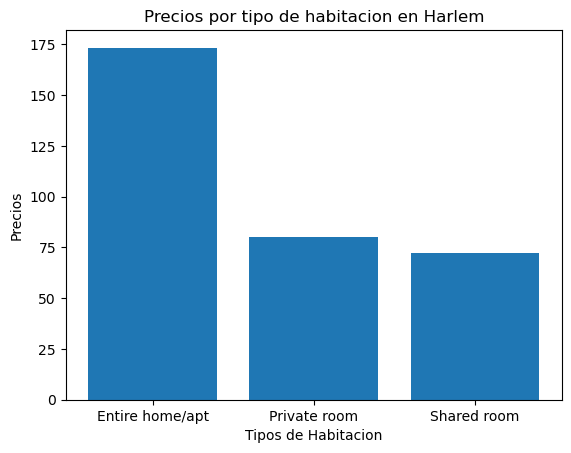

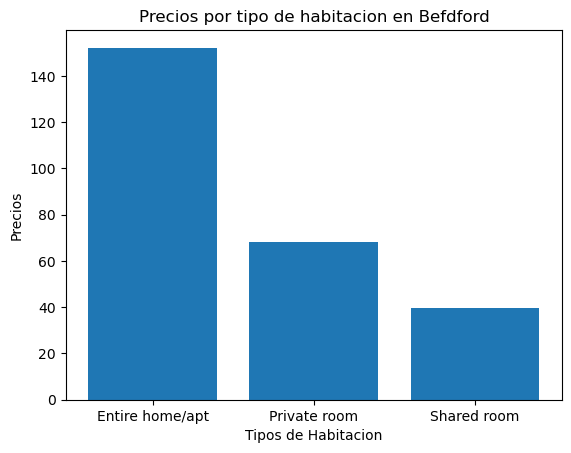

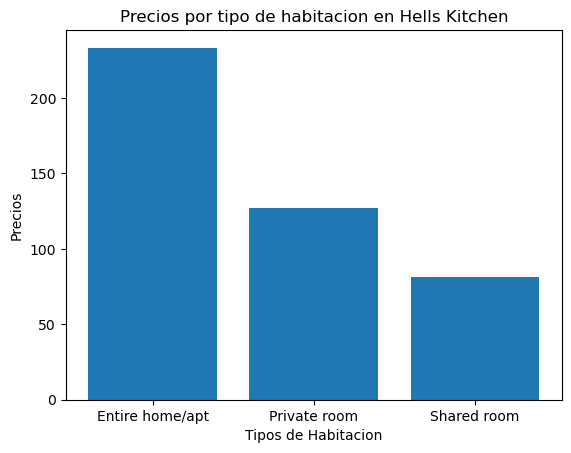

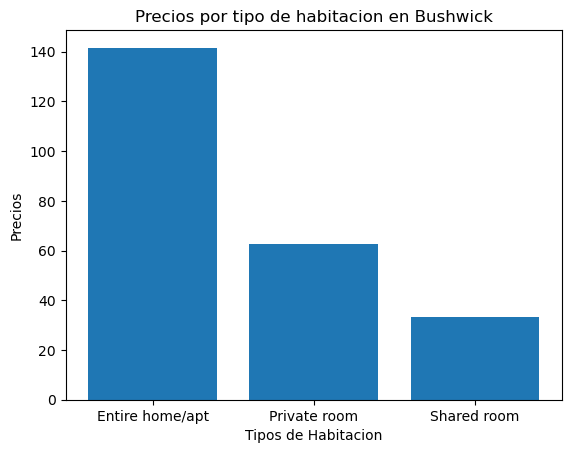

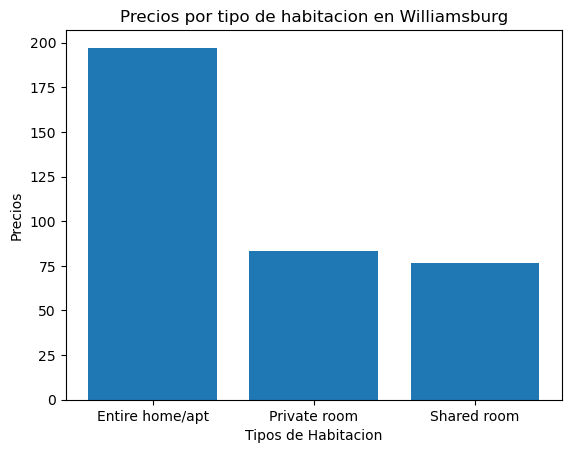

In [18]:
precios_medios = airbnbs.groupby(["neighbourhood", "room_type"])["price"].mean()
precios = precios_medios.reset_index()


# para el Barrio de harlem
preciosHarlem = precios.loc[precios['neighbourhood'] == "Harlem"]
#print(preciosHarlem["room_type"],preciosHarlem["price"])
plt.bar(preciosHarlem["room_type"],preciosHarlem["price"])
plt.title('Precios por tipo de habitacion en Harlem')
plt.xlabel('Tipos de Habitacion')
plt.ylabel('Precios')
plt.show()

# Para el barrio de Bedford-Stuyvesant
preciosBedfordStuyvesant = precios.loc[precios['neighbourhood'] == "Bedford-Stuyvesant"]
plt.bar(preciosBedfordStuyvesant["room_type"],preciosBedfordStuyvesant["price"])
plt.title('Precios por tipo de habitacion en Befdford')
plt.xlabel('Tipos de Habitacion')
plt.ylabel('Precios')
plt.show()


# Para el barrio de Hell´s Kitchen
preciosHK = precios.loc[precios['neighbourhood'] == "Hell's Kitchen"]
plt.bar(preciosHK["room_type"],preciosHK["price"])
plt.title('Precios por tipo de habitacion en Hells Kitchen')
plt.xlabel('Tipos de Habitacion')
plt.ylabel('Precios')
plt.show()


# Para el barrio de Bushwick
preciosBushwick = precios.loc[precios['neighbourhood'] == "Bushwick"]
plt.bar(preciosBushwick["room_type"],preciosBushwick["price"])
plt.title('Precios por tipo de habitacion en Bushwick')
plt.xlabel('Tipos de Habitacion')
plt.ylabel('Precios')
plt.show()

# Para el barrio de Williamsburg
preciosWilliamsburg = precios.loc[precios['neighbourhood'] == "Williamsburg"]
plt.bar(preciosWilliamsburg["room_type"],preciosWilliamsburg["price"])
plt.title('Precios por tipo de habitacion en Williamsburg')
plt.xlabel('Tipos de Habitacion')
plt.ylabel('Precios')
plt.show()





### Conclusiones